<a href="https://colab.research.google.com/github/AnnyshkaF/High-Performance-Lab/blob/main/task_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Histogram

<u>By using <i><strong>CuPy</strong></i>:</u>
* Implement the suggested function:
$$
 f(x) = (z^2(x) + z^3(x) - 200 \,\, z^4(x) )\,\,\sin(\,\,100000\,\,(x + 0.5)\,\,),
 \\
 \text{where    }\:\:\: z(x) = \sin(3\,\,x)-0.5
$$
* Plot function on the $x$ interval $[0,\,\, 1]$. Number of points = 10000000.
* Get minimal and maximal values of function on the interval $[0,\,\, 1]$: $f_{min}$ and $f_{max}$.
* Divide $y=f(x), \: (x \in [0,\,\, 1]) \:$ interval $[f_{min}, f_{max}]$ into $10$ $y=f(x)$ subintervals of length $\delta$ equal to $0.1 \,\, (f_{max}-f_{min})$: $[f_{min},\,\, f_{min} + \delta],\,\, [f_{min}+ \delta,\,\, f_{min} + 2 \,\, \delta],\,\, \dots,\,\, [f_{max}- \delta,\,\, f_{max}]$.
* Compute number of $y=f(x), \: (x \in [0,\,\, 1]) \:$ values in each subinterval. Use $\operatorname{cp.sum(\dots)}$
* Plot histogram.


In [1]:
!curl https://colab.chainer.org/install | sh -

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1580  100  1580    0     0   5319      0 --:--:-- --:--:-- --:--:--  5319
+ apt -y -q install cuda-libraries-dev-10-0
Reading package lists...
Building dependency tree...
Reading state information...
cuda-libraries-dev-10-0 is already the newest version (10.0.130-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
+ pip install -q cupy-cuda100  chainer 
     |████████████████████████████████| 58.9 MB 1.4 MB/s 
     |████████████████████████████████| 1.0 MB 41.6 MB/s 
+ set +ex
Installation succeeded!


In [16]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt

**Implement the suggested function**
$$
 f(x) = (z^2(x) + z^3(x) - 200 \,\, z^4(x) )\,\,\sin(\,\,100000\,\,(x + 0.5)\,\,),
 \\
 \text{where    }\:\:\: z(x) = \sin(3\,\,x)-0.5
$$

In [17]:
@cp.fuse()
def f(x):
    return (cp.power(z(x),2) + cp.power(z(x),3) - 200 * cp.power(z(x),4)) * cp.sin(1e5 * (x + 0.5))

@cp.fuse()
def z(x):
    return cp.sin(3 * x) - 0.5

**Plot function on the $x$ interval $[0,\,\, 1]$. Number of points = 10000000.**

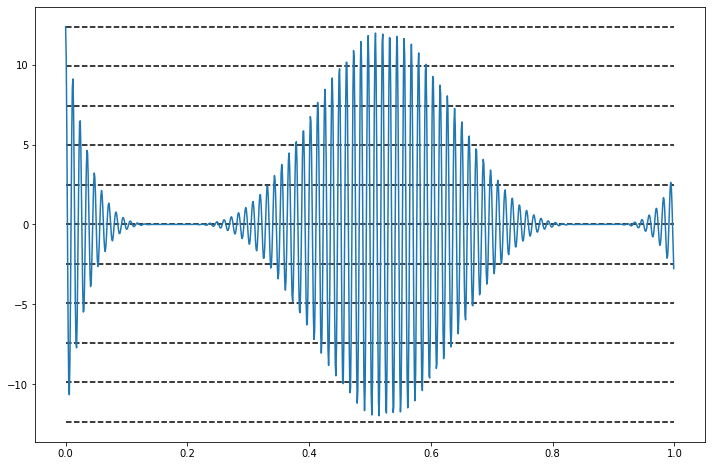

In [18]:
start, end = 0, 1
points = 10**7
x = cp.linspace(start, end, points)
y = f(x)

plt.figure(figsize=(12, 8))
plt.plot(x.get()[::10000], y.get()[::10000]) # take each 10000th point to plot
plt.hlines([np.float(f_min + i * delta) for i in range(11)], 0, 1, linestyles='--')

**Get minimal and maximal values of function on the interval $[0,\,\, 1]$: $f_{min}$ and $f_{max}$.**

In [19]:
f_min = y.min()
f_max = y.max()
delta = 0.1 * (f_max - f_min)

print('Min: {}. Max {}.'.format(f_min, f_max))

Min: -12.365544666168107. Max 12.374912294071224.


**Divide $y=f(x), \: (x \in [0,\,\, 1]) \:$ interval $[f_{min}, f_{max}]$ into $10$ $y=f(x)$ subintervals of length $\delta$ equal to $0.1 \,\, (f_{max}-f_{min})$: $[f_{min},\,\, f_{min} + \delta],\,\, [f_{min}+ \delta,\,\, f_{min} + 2 \,\, \delta],\,\, \dots,\,\, [f_{max}- \delta,\,\, f_{max}]$.**

**Compute number of $y=f(x), \: (x \in [0,\,\, 1]) \:$ values in each subinterval. Use $\operatorname{cp.sum(\dots)}$ and plot histogram.**

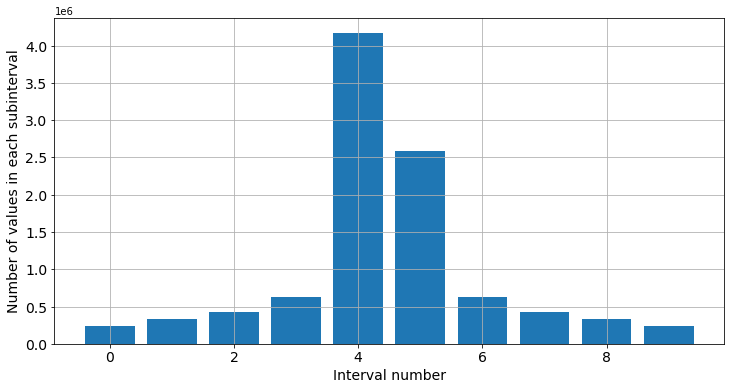

In [20]:
points_list = []
for i in range(10):
    in_points = ((f_min + (i+1)*delta) > y) & (y > (f_min + i*delta)) #
    in_points = cp.sum(in_points)
    in_points = cp.asnumpy(in_points)
    points_list.append(in_points)
points_list = np.array(points_list)

plt.figure(figsize=(12, 6))
plt.bar(np.arange(10),points_list)
plt.xlabel('Interval number', fontsize=14)
plt.ylabel('Number of values in each subinterval', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

**Comutational time of cp.sum() and np.sum().**

In [21]:
i = 1
cp_in_points = ((f_min + (i+1)*delta) > y) & (y > (f_min + i*delta))
np_in_points = cp.asnumpy(cp_in_points)

In [22]:
%timeit -n 100 cp.sum(cp_in_points)

100 loops, best of 5: 22.5 µs per loop


In [23]:
%timeit -n 100 np.sum(np_in_points)

100 loops, best of 5: 11.6 ms per loop
